In [43]:
import requests
from bs4 import BeautifulSoup
import json
#from readabilipy import simple_json_from_html_string
def get_url_list() -> list:
    """
    Get the list of URLs from the JSON file.

    Returns:
    list: A list of URLs to scrape.
    """
    path = './data/url_list.json'
    with open(path, 'r') as f:
        data = json.load(f)

    return data['urls']

def get_article_simple(url) -> bytes:
    """
    Get the HTML of the article from the URL.
    Args:
        url: url of the page to scrape

    Returns:
        bytes: The HTML of the article.
    """

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Connection': 'keep-alive',
        'Referer': 'https://www.google.com/'
    }
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        raise Exception(f"Failed to load page {url}. Error: {response.status_code}")
    response.encoding = response.apparent_encoding
    html = response.content

    return html
def get_title_and_text5(html_content):
    html_str = html_content.decode('utf-8')
    article = simple_json_from_html_string(html_str, use_readability=True)
    title = article.get('title', 'N/A')
    plain_text = article.get('plain_text', [])
    if plain_text:
        text_content = "\n".join([paragraph.get('text', '') for paragraph in plain_text])
    else:
        text_content = "N/A"
    return title, text_content
#url = "https://www.nytimes.com/2024/09/29/us/north-carolina-helene-relief-damage.html"
url = "https://www.faz.net/aktuell/wirtschaft/kuenstliche-intelligenz/today-s-ai-can-t-be-trusted-19532136.html"

try:
    html = get_article_simple(url)
    title, text = get_title_and_text5(html)
    print("Title:", title)
    print("Text:", text)
except Exception as e:
    print(e)

name 'simple_json_from_html_string' is not defined


In [44]:
urls = ["https://www.nytimes.com/2024/09/29/us/north-carolina-helene-relief-damage.html","https://www.faz.net/aktuell/wirtschaft/kuenstliche-intelligenz/today-s-ai-can-t-be-trusted-19532136.html","http://www.chinatoday.com.cn/ctenglish/2018/commentaries/202409/t20240925_800378506.html","https://english.elpais.com/economy-and-business/2024-09-28/from-the-hermes-heir-to-nicolas-cage-millionaires-who-went-bankrupt.html","https://insatiable.info/2023/06/30/quels-futur-pour-les-reseaux-sociaux/","https://actu.fr/auvergne-rhone-alpes/lyon_69123/lyon-le-projet-de-reamenagement-des-quais-les-plus-mortels-pour-les-cyclistes-devoile_61667371.html"]

In [45]:
from goose3 import Goose
from goose3.configuration import Configuration
# Initialize Goose extractor
g = Goose()

# Open a file to save the extracted content
for index, url in enumerate(urls, start=1):
    # 提取文章内容
    html = get_article_simple(url)
    if isinstance(html, bytes):
            html = html.decode('utf-8', 'ignore')
    else:
        html = str(html).encode('utf-8', 'ignore').decode('utf-8', 'ignore')

    article = g.extract(raw_html=html)

    file_name = f"goose{index}.txt"

    with open(file_name, "w", encoding="utf-8") as f:
        f.write(f"Title: {article.title}\n")
        f.write(f"Content:\n{article.cleaned_text}\n")

    print(f"Article saved to {file_name}")

print("All articles have been saved.")

Article saved to goose1.txt
Article saved to goose2.txt
Article saved to goose3.txt
Article saved to goose4.txt


Article saved to goose5.txt
Article saved to goose6.txt
All articles have been saved.


In [46]:
import requests
from goose3 import Goose

url = urls[5]

g = Goose()

article = g.extract(url=url)

file_name = f"goose6_newversion.txt"

with open(file_name, "w", encoding="utf-8") as f:
    f.write(f"Title: {article.title}\n")
    f.write(f"Content:\n{article.cleaned_text}\n")

In [48]:
#The result of text extraction for url[1] is bad so I use a new method
url = urls[1]

g = Goose()

article = g.extract(url=url)

file_name = f"goose2_newversion.txt"

with open(file_name, "w", encoding="utf-8") as f:
    f.write(f"Title: {article.title}\n")
    f.write(f"Content:\n{article.cleaned_text}\n")

Method for evaluate the extraction results: text similarity
https://www.kaggle.com/code/jurk06/text-similarity-theory

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Two example strings
text1 = "This is the first text."
text2 = "This is the second text."

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the strings into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform([text1, text2])

# Calculate cosine similarity between the vectors
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

# Display the result
print(f"Cosine Similarity: {cosine_sim[0][0]}")

In [35]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

file_pairs = [
    ("/content/01.txt", "/content/goose1.txt"),
    ("/content/02.txt", "/content/goose2.txt"),
    ("/content/03.txt", "/content/goose3.txt"),
    ("/content/04.txt", "/content/goose4.txt"),
    ("/content/05.txt", "/content/goose5.txt"),
    ("/content/05.txt", "/content/goose6_newversion.txt"),
]

vectorizer = TfidfVectorizer()

# Create an empty list to store the similarity scores for each pair of texts
cosine_similarities = []

# Calculate the similarity for each text pair and store it in the list
for i, (file1, file2) in enumerate(file_pairs, start=1):

    text1 = read_text(file1)
    text2 = read_text(file2)

    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

    # Append the result to the list
    cosine_similarities.append(cosine_sim[0][0])

    # Print the similarity for each text pair
    print(f"Pair {i}: Cosine Similarity between {file1} and {file2} is {cosine_sim[0][0]}")

# Print the list of all similarity scores
print("Cosine Similarities:", cosine_similarities)


Pair 1: Cosine Similarity between /content/01.txt and /content/goose1.txt is 0.979672297535647
Pair 2: Cosine Similarity between /content/02.txt and /content/goose2.txt is 0.061726484607090806
Pair 3: Cosine Similarity between /content/03.txt and /content/goose3.txt is 0.9971376337462214
Pair 4: Cosine Similarity between /content/04.txt and /content/goose4.txt is 0.99247568051387
Pair 5: Cosine Similarity between /content/05.txt and /content/goose5.txt is 0.7725234185871049
Pair 6: Cosine Similarity between /content/05.txt and /content/goose6_newversion.txt is 0.6908348736504027
Cosine Similarities: [0.979672297535647, 0.061726484607090806, 0.9971376337462214, 0.99247568051387, 0.7725234185871049, 0.6908348736504027]


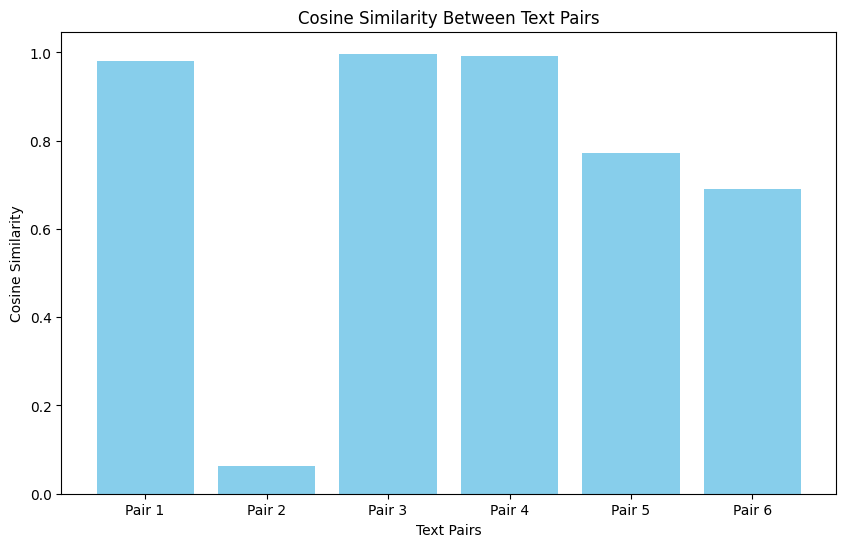

In [36]:
import matplotlib.pyplot as plt

# Cosine similarity results inherited from the previous code block

# Define labels for the text pairs
pair_labels = ['Pair 1', 'Pair 2', 'Pair 3', 'Pair 4', 'Pair 5', 'Pair 6']

# Create the chart
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, cosine_similarities, color='skyblue')

# Add title and labels
plt.title('Cosine Similarity Between Text Pairs')
plt.xlabel('Text Pairs')
plt.ylabel('Cosine Similarity')

# Save the plot as an image file in the current directory
plt.savefig('cosine_similarity_chart.png')

plt.show()


In [49]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

file_pairs = [
    ("/content/01.txt", "/content/goose1.txt"),
    ("/content/02.txt", "/content/goose2_newversion.txt"),
    ("/content/03.txt", "/content/goose3.txt"),
    ("/content/04.txt", "/content/goose4.txt"),
    ("/content/05.txt", "/content/goose5.txt"),
    ("/content/05.txt", "/content/goose6_newversion.txt"),
]

vectorizer = TfidfVectorizer()

# Create an empty list to store the similarity scores for each pair of texts
cosine_similarities = []

# Calculate the similarity for each text pair and store it in the list
for i, (file1, file2) in enumerate(file_pairs, start=1):

    text1 = read_text(file1)
    text2 = read_text(file2)

    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

    # Append the result to the list
    cosine_similarities.append(cosine_sim[0][0])

    # Print the similarity for each text pair
    print(f"Pair {i}: Cosine Similarity between {file1} and {file2} is {cosine_sim[0][0]}")

# Print the list of all similarity scores
print("Cosine Similarities:", cosine_similarities)


Pair 1: Cosine Similarity between /content/01.txt and /content/goose1.txt is 0.979672297535647
Pair 2: Cosine Similarity between /content/02.txt and /content/goose2_newversion.txt is 0.061726484607090806
Pair 3: Cosine Similarity between /content/03.txt and /content/goose3.txt is 0.9971376337462214
Pair 4: Cosine Similarity between /content/04.txt and /content/goose4.txt is 0.99247568051387
Pair 5: Cosine Similarity between /content/05.txt and /content/goose5.txt is 0.7725234185871049
Pair 6: Cosine Similarity between /content/05.txt and /content/goose6_newversion.txt is 0.6908348736504027
Cosine Similarities: [0.979672297535647, 0.061726484607090806, 0.9971376337462214, 0.99247568051387, 0.7725234185871049, 0.6908348736504027]


Pair 1: Levenshtein Distance between /content/01.txt and /content/goose1.txt is 1732
Pair 2: Levenshtein Distance between /content/02.txt and /content/goose2.txt is 13414
Pair 3: Levenshtein Distance between /content/03.txt and /content/goose3.txt is 174
Pair 4: Levenshtein Distance between /content/04.txt and /content/goose4.txt is 1434
Pair 5: Levenshtein Distance between /content/05.txt and /content/goose5.txt is 409
Pair 6: Levenshtein Distance between /content/05.txt and /content/goose6_newversion.txt is 4335
Levenshtein Distances: [1732, 13414, 174, 1434, 409, 4335]


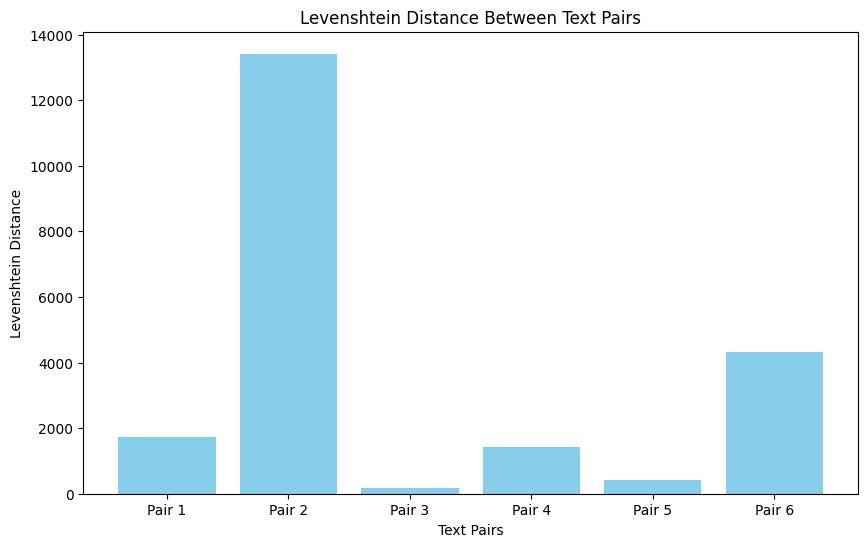

In [40]:
import os
import Levenshtein as lev  # Importing the Levenshtein module for distance calculation
import matplotlib.pyplot as plt

def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

file_pairs = [
    ("/content/01.txt", "/content/goose1.txt"),
    ("/content/02.txt", "/content/goose2.txt"),
    ("/content/03.txt", "/content/goose3.txt"),
    ("/content/04.txt", "/content/goose4.txt"),
    ("/content/05.txt", "/content/goose5.txt"),
    ("/content/05.txt", "/content/goose6_newversion.txt"),
]

# List to store Levenshtein distances for each pair
lev_distances = []

# Calculate Levenshtein distance for each pair of texts and store it in the list
for i, (file1, file2) in enumerate(file_pairs, start=1):

    text1 = read_text(file1)
    text2 = read_text(file2)

    # Calculate Levenshtein distance between two text strings
    distance = lev.distance(text1, text2)

    # Append the result to the list
    lev_distances.append(distance)

    # Print the Levenshtein distance for each text pair
    print(f"Pair {i}: Levenshtein Distance between {file1} and {file2} is {distance}")

# Print the list of all Levenshtein distances
print("Levenshtein Distances:", lev_distances)

# Define labels for the text pairs
pair_labels = ['Pair 1', 'Pair 2', 'Pair 3', 'Pair 4', 'Pair 5', 'Pair 6']

# Create the chart using the lev_distances from the above loop
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, lev_distances, color='skyblue')

# Add title and labels
plt.title('Levenshtein Distance Between Text Pairs')
plt.xlabel('Text Pairs')
plt.ylabel('Levenshtein Distance')

# Save the plot as an image file in the current directory
plt.savefig('levenshtein_distance_chart.png')

# Show the plot
plt.show()


Pair 1: Jaccard Similarity between /content/01.txt and /content/goose1.txt is 0.818577648766328
Pair 2: Jaccard Similarity between /content/02.txt and /content/goose2.txt is 0.006376195536663124
Pair 3: Jaccard Similarity between /content/03.txt and /content/goose3.txt is 0.9544468546637744
Pair 4: Jaccard Similarity between /content/04.txt and /content/goose4.txt is 0.9003147953830011
Pair 5: Jaccard Similarity between /content/05.txt and /content/goose5.txt is 0.4332874828060523
Pair 6: Jaccard Similarity between /content/05.txt and /content/goose6_newversion.txt is 0.07476635514018691
Jaccard Similarities: [0.818577648766328, 0.006376195536663124, 0.9544468546637744, 0.9003147953830011, 0.4332874828060523, 0.07476635514018691]


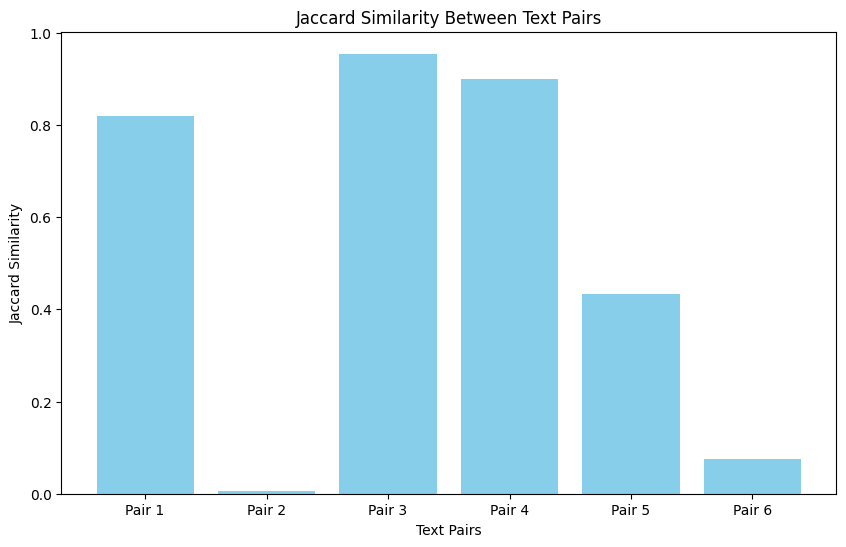

In [47]:
import os
import matplotlib.pyplot as plt

def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def jaccard_similarity(text1, text2):
    # Convert both texts into sets of words
    set1 = set(text1.split())
    set2 = set(text2.split())

    # Calculate the intersection and union of the sets
    intersection = set1.intersection(set2)
    union = set1.union(set2)

    # Calculate Jaccard similarity
    return len(intersection) / len(union) if union else 0

file_pairs = [
    ("/content/01.txt", "/content/goose1.txt"),
    ("/content/02.txt", "/content/goose2.txt"),
    ("/content/03.txt", "/content/goose3.txt"),
    ("/content/04.txt", "/content/goose4.txt"),
    ("/content/05.txt", "/content/goose5.txt"),
    ("/content/05.txt", "/content/goose6_newversion.txt"),
]

# List to store Jaccard similarities for each pair
jaccard_similarities = []

# Calculate Jaccard similarity for each pair of texts and store it in the list
for i, (file1, file2) in enumerate(file_pairs, start=1):

    text1 = read_text(file1)
    text2 = read_text(file2)

    # Calculate Jaccard similarity between two text strings
    similarity = jaccard_similarity(text1, text2)

    # Append the result to the list
    jaccard_similarities.append(similarity)

    # Print the Jaccard similarity for each text pair
    print(f"Pair {i}: Jaccard Similarity between {file1} and {file2} is {similarity}")

# Print the list of all Jaccard similarities
print("Jaccard Similarities:", jaccard_similarities)

# Define labels for the text pairs
pair_labels = ['Pair 1', 'Pair 2', 'Pair 3', 'Pair 4', 'Pair 5', 'Pair 6']

# Create the chart using the jaccard_similarities from the above loop
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, jaccard_similarities, color='skyblue')

# Add title and labels
plt.title('Jaccard Similarity Between Text Pairs')
plt.xlabel('Text Pairs')
plt.ylabel('Jaccard Similarity')

# Save the plot as an image file in the current directory
plt.savefig('jaccard_similarity_chart.png')

# Show the plot
plt.show()


[==================================================] 100.0% 128.1/128.1MB downloaded
Pair 1: Cosine Similarity between /content/01.txt and /content/goose1.txt is 0.9993918538093567
Pair 2: Cosine Similarity between /content/02.txt and /content/goose2.txt is 0.33235469460487366
Pair 3: Cosine Similarity between /content/03.txt and /content/goose3.txt is 0.9999849200248718
Pair 4: Cosine Similarity between /content/04.txt and /content/goose4.txt is 0.9998794198036194
Pair 5: Cosine Similarity between /content/05.txt and /content/goose5.txt is 0.9984422922134399
Pair 6: Cosine Similarity between /content/05.txt and /content/goose6_newversion.txt is 0.989660918712616
Similarities: [0.99939185, 0.3323547, 0.9999849, 0.9998794, 0.9984423, 0.9896609]


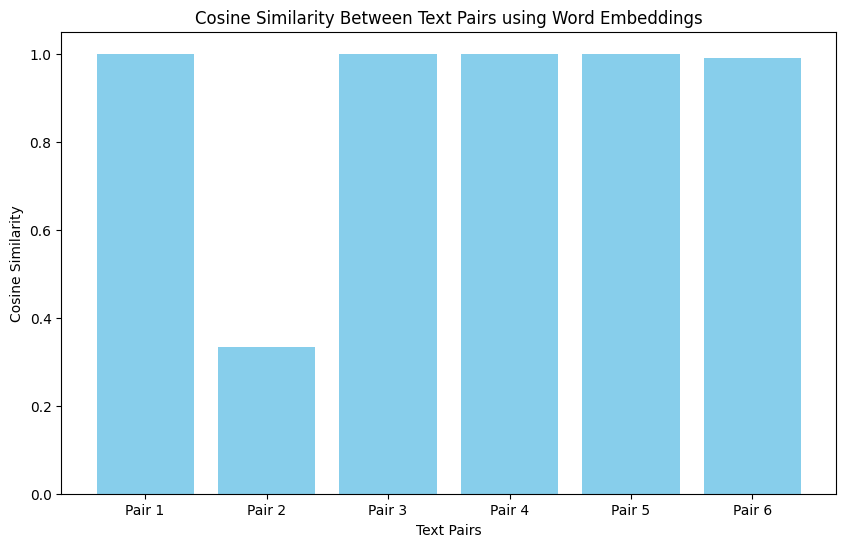

In [50]:
import os
import gensim.downloader as api  # To download pre-trained models
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load a pre-trained Word2Vec model (e.g., GloVe or Word2Vec)
model = api.load('glove-wiki-gigaword-100')  # GloVe with 100-dimensional vectors

def read_text(file_path):
    """Reads the content of the text file and returns it as a string."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def text_to_vector(text, model):
    """Converts text into a vector by averaging the vectors of the words in the text."""
    words = text.split()  # Split the text into words
    word_vectors = []

    for word in words:
        if word in model:
            word_vectors.append(model[word])

    # If word vectors are found, compute the average of those vectors
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found

def calculate_similarity(vector1, vector2):
    """Calculates cosine similarity between two vectors."""
    return cosine_similarity([vector1], [vector2])[0][0]

# List of text file pairs to compare
file_pairs = [
    ("/content/01.txt", "/content/goose1.txt"),
    ("/content/02.txt", "/content/goose2.txt"),
    ("/content/03.txt", "/content/goose3.txt"),
    ("/content/04.txt", "/content/goose4.txt"),
    ("/content/05.txt", "/content/goose5.txt"),
    ("/content/05.txt", "/content/goose6_newversion.txt"),
]

# List to store similarity scores for each pair
similarities = []

# Process each file pair
for i, (file1, file2) in enumerate(file_pairs, start=1):

    text1 = read_text(file1)
    text2 = read_text(file2)

    # Convert each text to a vector using word embeddings
    vector1 = text_to_vector(text1, model)
    vector2 = text_to_vector(text2, model)

    # Calculate cosine similarity between the two vectors
    similarity = calculate_similarity(vector1, vector2)

    # Append the result to the list
    similarities.append(similarity)

    # Print similarity for the pair
    print(f"Pair {i}: Cosine Similarity between {file1} and {file2} is {similarity}")

# Print the list of all similarities
print("Similarities:", similarities)

# Define labels for the text pairs
pair_labels = ['Pair 1', 'Pair 2', 'Pair 3', 'Pair 4', 'Pair 5', 'Pair 6']

# Create the chart using the similarities from the above loop
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, similarities, color='skyblue')

# Add title and labels
plt.title('Cosine Similarity Between Text Pairs using Word Embeddings')
plt.xlabel('Text Pairs')
plt.ylabel('Cosine Similarity')

# Save the plot as an image file in the current directory
plt.savefig('word_embeddings_similarity_chart.png')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Pair 1: Cosine Similarity between /content/01.txt and /content/goose1.txt is 0.9720158576965332
Pair 2: Cosine Similarity between /content/02.txt and /content/goose2.txt is 0.7794872522354126
Pair 3: Cosine Similarity between /content/03.txt and /content/goose3.txt is 0.9780685901641846
Pair 4: Cosine Similarity between /content/04.txt and /content/goose4.txt is 0.9435428380966187
Pair 5: Cosine Similarity between /content/05.txt and /content/goose5.txt is 0.9903978705406189
Pair 6: Cosine Similarity between /content/05.txt and /content/goose6_newversion.txt is 0.9077224731445312
Similarities: [0.97201586, 0.77948725, 0.9780686, 0.94354284, 0.9903979, 0.9077225]


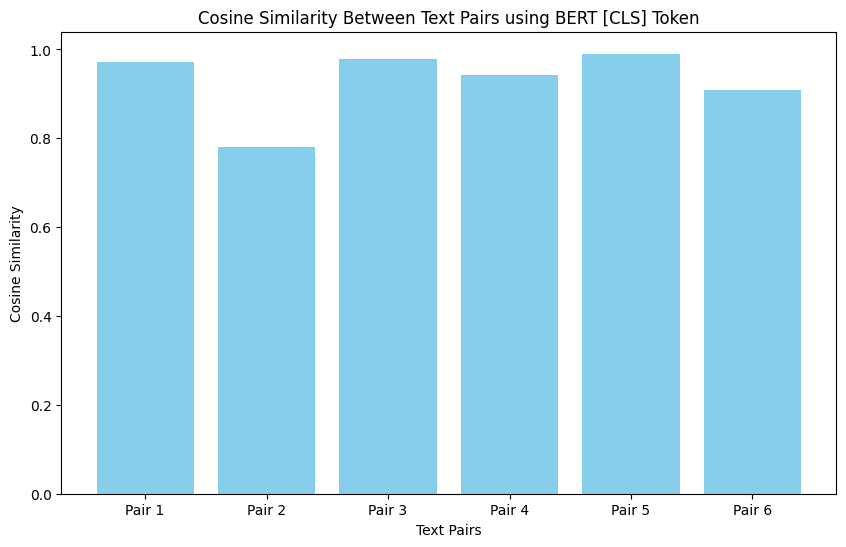

In [51]:
import os
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def read_text(file_path):
    """Reads the content of the text file and returns it as a string."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def text_to_bert_vector(text, tokenizer, model):
    """Converts text into a BERT vector using the [CLS] token representation."""
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512, padding=True)
    outputs = model(**inputs)

    # The last hidden state contains the [CLS] token representation
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # Extract the embedding for [CLS] token
    return cls_embedding.detach().numpy().flatten()  # Convert to numpy array and flatten

def calculate_similarity(vector1, vector2):
    """Calculates cosine similarity between two vectors."""
    return cosine_similarity([vector1], [vector2])[0][0]

file_pairs = [
    ("/content/01.txt", "/content/goose1.txt"),
    ("/content/02.txt", "/content/goose2.txt"),
    ("/content/03.txt", "/content/goose3.txt"),
    ("/content/04.txt", "/content/goose4.txt"),
    ("/content/05.txt", "/content/goose5.txt"),
    ("/content/05.txt", "/content/goose6_newversion.txt"),
]

# List to store cosine similarity scores for each pair
similarities = []

# Process each file pair
for i, (file1, file2) in enumerate(file_pairs, start=1):

    text1 = read_text(file1)
    text2 = read_text(file2)

    # Convert each text to a vector using BERT's [CLS] token representation
    vector1 = text_to_bert_vector(text1, tokenizer, model)
    vector2 = text_to_bert_vector(text2, tokenizer, model)

    # Calculate cosine similarity between the two vectors
    similarity = calculate_similarity(vector1, vector2)

    # Append the result to the list
    similarities.append(similarity)

    # Print similarity for the pair
    print(f"Pair {i}: Cosine Similarity between {file1} and {file2} is {similarity}")

# Print the list of all similarities
print("Similarities:", similarities)

# Define labels for the text pairs
pair_labels = ['Pair 1', 'Pair 2', 'Pair 3', 'Pair 4', 'Pair 5', 'Pair 6']

# Create the chart using the similarities from the above loop
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, similarities, color='skyblue')

# Add title and labels
plt.title('Cosine Similarity Between Text Pairs using BERT [CLS] Token')
plt.xlabel('Text Pairs')
plt.ylabel('Cosine Similarity')

# Save the plot as an image file in the current directory
plt.savefig('bert_similarity_chart.png')

# Show the plot
plt.show()


Pair 1: Levenshtein Distance between /content/01.txt and /content/goose1.txt is 1732
Pair 1: Jaro-Winkler Distance between /content/01.txt and /content/goose1.txt is 0.7784526923021243
Pair 1: Hamming Distance between /content/01.txt and /content/goose1.txt is 7653
Pair 2: Levenshtein Distance between /content/02.txt and /content/goose2.txt is 13414
Pair 2: Jaro-Winkler Distance between /content/02.txt and /content/goose2.txt is 0.50694077649458
Pair 2: Hamming Distance between /content/02.txt and /content/goose2.txt is 13623
Pair 3: Levenshtein Distance between /content/03.txt and /content/goose3.txt is 174
Pair 3: Jaro-Winkler Distance between /content/03.txt and /content/goose3.txt is 0.8348835294749867
Pair 3: Hamming Distance between /content/03.txt and /content/goose3.txt is 5343
Pair 4: Levenshtein Distance between /content/04.txt and /content/goose4.txt is 1434
Pair 4: Jaro-Winkler Distance between /content/04.txt and /content/goose4.txt is 0.8082692501998784
Pair 4: Hamming Di

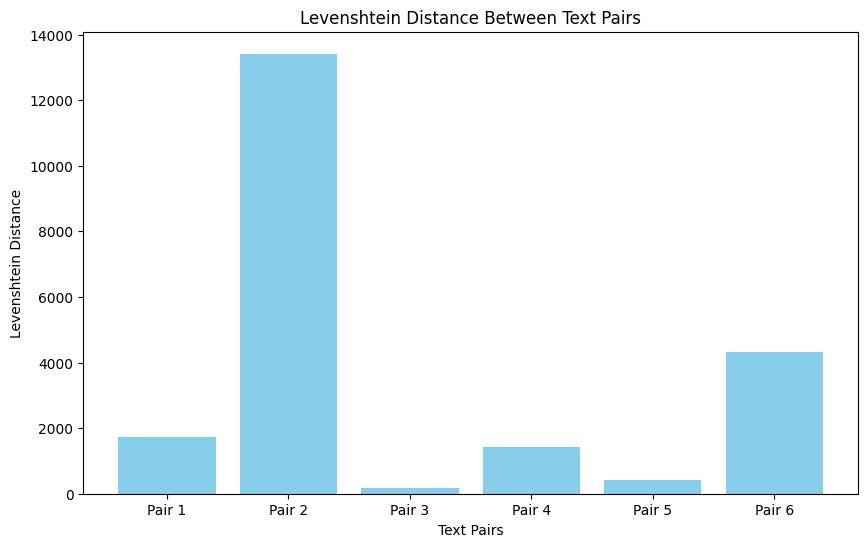

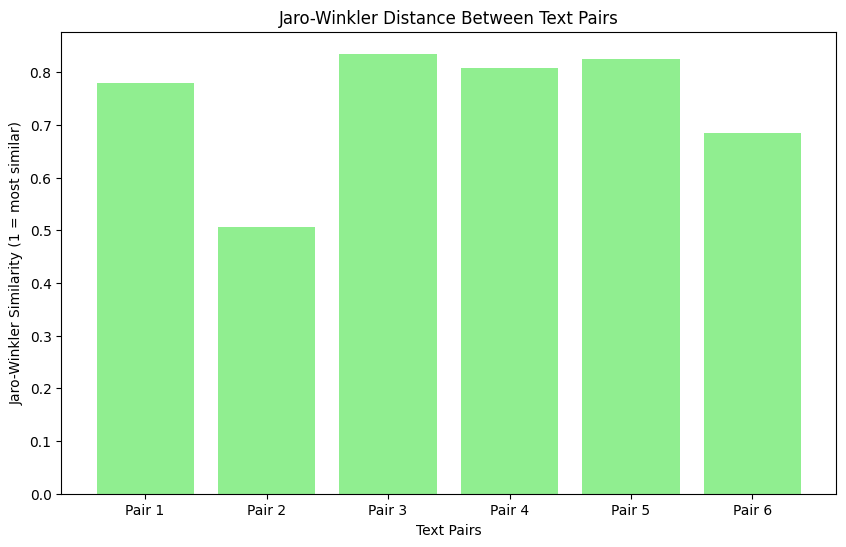

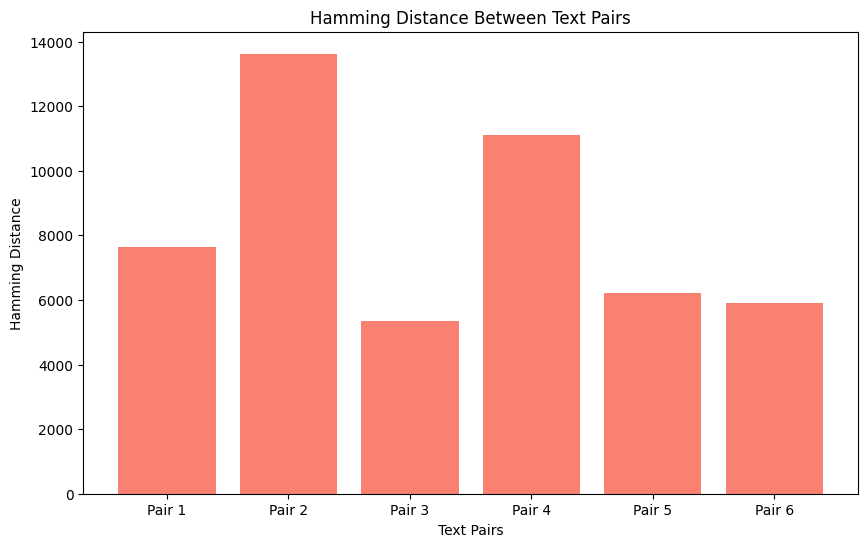

In [54]:
import os
import Levenshtein as lev
import distance  # For Hamming distance and other distance metrics
import matplotlib.pyplot as plt

def read_text(file_path):
    """Reads the content of the text file and returns it as a string."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def calculate_levenshtein(text1, text2):
    """Calculates Levenshtein distance between two strings."""
    return lev.distance(text1, text2)

def calculate_jaro_winkler(text1, text2):
    """Calculates Jaro-Winkler distance between two strings."""
    return lev.jaro_winkler(text1, text2)

def calculate_hamming(text1, text2):
    """Calculates Hamming distance between two strings. Only works if strings are of equal length."""
    if len(text1) == len(text2):
        return distance.hamming(text1, text2)
    else:
        # Return a high value if strings are of different lengths since Hamming is undefined in this case
        return max(len(text1), len(text2))

file_pairs = [
    ("/content/01.txt", "/content/goose1.txt"),
    ("/content/02.txt", "/content/goose2.txt"),
    ("/content/03.txt", "/content/goose3.txt"),
    ("/content/04.txt", "/content/goose4.txt"),
    ("/content/05.txt", "/content/goose5.txt"),
    ("/content/05.txt", "/content/goose6_newversion.txt"),
]

# Lists to store the distance scores for each metric
levenshtein_distances = []
jaro_winkler_distances = []
hamming_distances = []

# Process each file pair
for i, (file1, file2) in enumerate(file_pairs, start=1):

    text1 = read_text(file1)
    text2 = read_text(file2)

    # Calculate distances using different string metrics
    levenshtein_distance = calculate_levenshtein(text1, text2)
    jaro_winkler_distance = calculate_jaro_winkler(text1, text2)
    hamming_distance = calculate_hamming(text1, text2)

    # Append the results to their respective lists
    levenshtein_distances.append(levenshtein_distance)
    jaro_winkler_distances.append(jaro_winkler_distance)
    hamming_distances.append(hamming_distance)

    # Print the distances for each pair
    print(f"Pair {i}: Levenshtein Distance between {file1} and {file2} is {levenshtein_distance}")
    print(f"Pair {i}: Jaro-Winkler Distance between {file1} and {file2} is {jaro_winkler_distance}")
    print(f"Pair {i}: Hamming Distance between {file1} and {file2} is {hamming_distance}")

# Print the lists of distances for each metric
print("Levenshtein Distances:", levenshtein_distances)
print("Jaro-Winkler Distances:", jaro_winkler_distances)
print("Hamming Distances:", hamming_distances)

# Define labels for the text pairs
pair_labels = ['Pair 1', 'Pair 2', 'Pair 3', 'Pair 4', 'Pair 5', 'Pair 6']

# Create charts to visualize the distances

# Levenshtein Distance Chart
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, levenshtein_distances, color='skyblue')
plt.title('Levenshtein Distance Between Text Pairs')
plt.xlabel('Text Pairs')
plt.ylabel('Levenshtein Distance')
plt.savefig('levenshtein_distance_chart.png')
plt.show()

# Jaro-Winkler Distance Chart
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, jaro_winkler_distances, color='lightgreen')
plt.title('Jaro-Winkler Distance Between Text Pairs')
plt.xlabel('Text Pairs')
plt.ylabel('Jaro-Winkler Similarity (1 = most similar)')
plt.savefig('jaro_winkler_distance_chart.png')
plt.show()

# Hamming Distance Chart
plt.figure(figsize=(10, 6))
plt.bar(pair_labels, hamming_distances, color='salmon')
plt.title('Hamming Distance Between Text Pairs')
plt.xlabel('Text Pairs')
plt.ylabel('Hamming Distance')
plt.savefig('hamming_distance_chart.png')
plt.show()


In [ ]:
import re
ad_keywords = [
    # 德语
    'Jetzt mehr erfahren', 'Zum Zinsangebot', 'Rabattcode', 'kostenfrei', 'Test', 'Angebot sichern',
    'Verlagsangebot', 'Werbefrei lesen', 'Jetzt vergleichen', 'Automarkt', 'Jetzt Angebot sichern',
    'Jetzt weiterlesen', 'Dies ist kein Abo', 'kostenlos', 'Immobilienbewertung', 'Zum F.A.Z.-Automarkt',
    'Bundesanstalt für Geowissenschaften', 'Bundesanstalt für Straßenwesen', 'Stellenmarkt', 'Kostenlose Anmeldung',
    'Sonderangebot', 'Gutschein', 'Abonnieren und sparen', '50% Rabatt', 'Sichern Sie sich das Angebot',
    'Jetzt bewerben', 'Karrierechance', 'Jobangebot', 'Sofort verfügbar', 'Schnell bewerben',  # 招聘类
    'Bestellen Sie jetzt', 'Jetzt einkaufen', 'Kaufen Sie jetzt', 'Nur noch wenige verfügbar',  # 购买物品广告
    'Weitere Themen lesen', 'Mehr erfahren', 'Mehr Artikel', 'Entdecken Sie weitere Kategorien',  # 阅读广告

    # 英语
    'Learn more', 'Sign up for free', 'Limited time offer', 'Discount code', 'Free trial', 'Subscribe now',
    'Buy now', 'Best price', 'Order now', 'Free shipping', 'Get a quote', 'Limited time only', '50% off',
    'Claim your discount', 'Register now', 'Special offer', 'One-time offer', 'No hidden fees', 'Exclusive deal',
    'Apply now', 'Career opportunity', 'Job opening', 'Hiring now', 'Urgent hiring',  # 招聘类
    'Shop now', 'Buy today', 'Limited stock', 'Only a few left', 'Order now',  # 购买物品广告
    'Read more articles', 'Explore more topics', 'Discover more', 'Continue reading',  # 阅读广告

    # 西班牙语
    'Más información', 'Oferta limitada', 'Código de descuento', 'Envío gratis', 'Prueba gratuita',
    'Suscríbete ahora', 'Compra ahora', 'Mejor precio', 'Ordena ahora', '50% de descuento', 'Recibe tu descuento',
    'Oferta especial', 'Registro gratis', 'Oferta exclusiva', 'Sin costos ocultos', 'Consigue la oferta',
    'Accede a la oferta', 'Disponible por tiempo limitado',
    'Solicita ahora', 'Oportunidad de empleo', 'Ofertas de trabajo', 'Contratación inmediata', 'Aplica ya',  # 招聘类
    'Compra ahora', 'Ordena hoy', 'Stock limitado', 'Solo quedan unos pocos',  # 购买物品广告
    'Leer más', 'Explorar más artículos', 'Descubre más temas', 'Continúa leyendo',  # 阅读广告

    # 意大利语
    'Scopri di più', 'Offerta speciale', 'Codice sconto', 'Spedizione gratuita', 'Prova gratuita', 'Abbonati ora',
    'Compra subito', 'Prezzo migliore', '50% di sconto', 'Approfitta dell\'offerta', 'Registrati gratis',
    'Offerta limitata', 'Senza costi nascosti', 'Promozione esclusiva', 'Ordina adesso', 'Ricevi uno sconto',
    'Solo per oggi', 'Offerta valida fino a esaurimento scorte',
    'Candidati ora', 'Offerta di lavoro', 'Posizioni aperte', 'Assunzioni immediate', 'Candidati subito',  # 招聘类
    'Acquista subito', 'Ordina oggi', 'Solo pochi disponibili', 'Acquista ora',  # 购买物品广告
    'Leggi di più', 'Esplora altri articoli', 'Scopri altre categorie', 'Continua a leggere',  # 阅读广告

    # 中文
    '立即了解', '优惠码', '免费注册', '限时优惠', '折扣', '立即购买', '现在订阅', '最佳价格', '促销活动', '立刻下单',
    '包邮', '获取报价', '独家优惠', '无隐藏费用', '限时促销', '免费试用', '马上抢购', '今日特价', '限量供应',
    '立即申请', '职位机会', '招聘中', '立刻招聘', '职位空缺',  # 招聘类
    '立刻购买', '现在下单', '仅剩少量', '库存有限',  # 购买物品广告
    '阅读更多', '探索更多', '发现更多主题', '继续阅读'  # 阅读广告
]
ad_patterns = [
    r'http\S+',        # URL链接
    r'\d+ €',          # 价格
    r'Rabattcode',     # 折扣码
    r'Jetzt \S+',      # 类似 "现在…"
    r'kostenlos',      # 免费
    r'Angebot',        # 提供优惠
]

# 处理文本的函数
def remove_ads(text):
    # 按行分割文本
    lines = text.split('\n')

    # 基于关键词过滤掉广告行
    filtered_lines = []
    for line in lines:
        if not any(keyword in line for keyword in ad_keywords):
            filtered_lines.append(line)

    # 使用正则表达式过滤广告内容
    cleaned_lines = []
    for line in filtered_lines:
        if not any(re.search(pattern, line) for pattern in ad_patterns):
            cleaned_lines.append(line)

    # 返回处理后的文本
    return '\n'.join(cleaned_lines)

# 示例文本（你从网页爬取的文本）
crawled_text = article.cleaned_text

# 使用广告过滤函数处理文本
cleaned_text = remove_ads(crawled_text)

# 输出去除广告后的文本
print(cleaned_text)


你的长文本数据


Cosine Similarity: 0.6694188517266485
